[Chronology of world oil market events](https://en.wikipedia.org/wiki/Chronology_of_world_oil_market_events#1996)

### Asian financial crisis, OPEC oversupply

**Context:** The Asian financial crisis began in Thailand in 1997 and quickly spread to other Asian economies, leading to a severe economic downturn. Countries like South Korea, Indonesia, and Malaysia were heavily affected.

**Impact on Oil Prices:** As these economies contracted, demand for oil plummeted. Consequently, oil prices fell sharply from over 20 / barrel in mid-1997 to around 10-12 / barrel by late 1998.

The Asian Financial Crisis primarily occurred between July 1997 and December 1998. Here’s a more detailed breakdown:

**July 2, 1997:** The crisis began in Thailand when the Thai baht was floated, leading to a rapid devaluation after the government ran out of foreign exchange reserves to support it.

**Late 1997:** The crisis spread to other Southeast Asian countries, including Indonesia, Malaysia, South Korea, and the Philippines. Major currency depreciations and stock market crashes followed.

**1998:** The crisis reached its peak, with countries facing severe economic downturns, high inflation, and social unrest.

**December 1998:** While the immediate crisis started to abate, many countries in the region continued to experience economic challenges and reform efforts in the following years.

**Oil Market Impact:** 

With reduced industrial activity, the demand for oil and energy in these countries decreased. Asia was a key driver of global oil demand growth in the 1990s, so the downturn in these economies created a global oil supply glut.

**Outcome:**

This oversupply, coupled with declining demand, pushed oil prices lower. The oil market moved from a tight supply-demand balance to a situation of excess supply, further depressing prices.

### OPEC Oversupply

**Context:** In response to falling oil prices during the Asian financial crisis, OPEC (the Organization of the Petroleum Exporting Countries) increased production to maintain market share.

**Impact on Oil Prices:** This decision to oversupply the market exacerbated the decline in oil prices:
The increased supply from OPEC, combined with diminished demand due to the economic crisis, created a significant imbalance.
By 1998, oil prices were severely depressed, reaching their lowest levels in decades, with prices hovering around $10 per barrel.

#### Speculative Opportunities Ideas

1. Short oil futures or oil ETFs
2. Buy put options on oil ETFs
3. Currency Trading Related to Oil Prices

   Trade currency pairs that are sensitive to oil price movements, particularly in countries heavily reliant on oil exports.

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from arch import arch_model

In [27]:
df = pd.read_csv('./../../../data/oil-price.csv' , parse_dates=['date'])  

In [28]:
df.set_index('date', inplace=True)

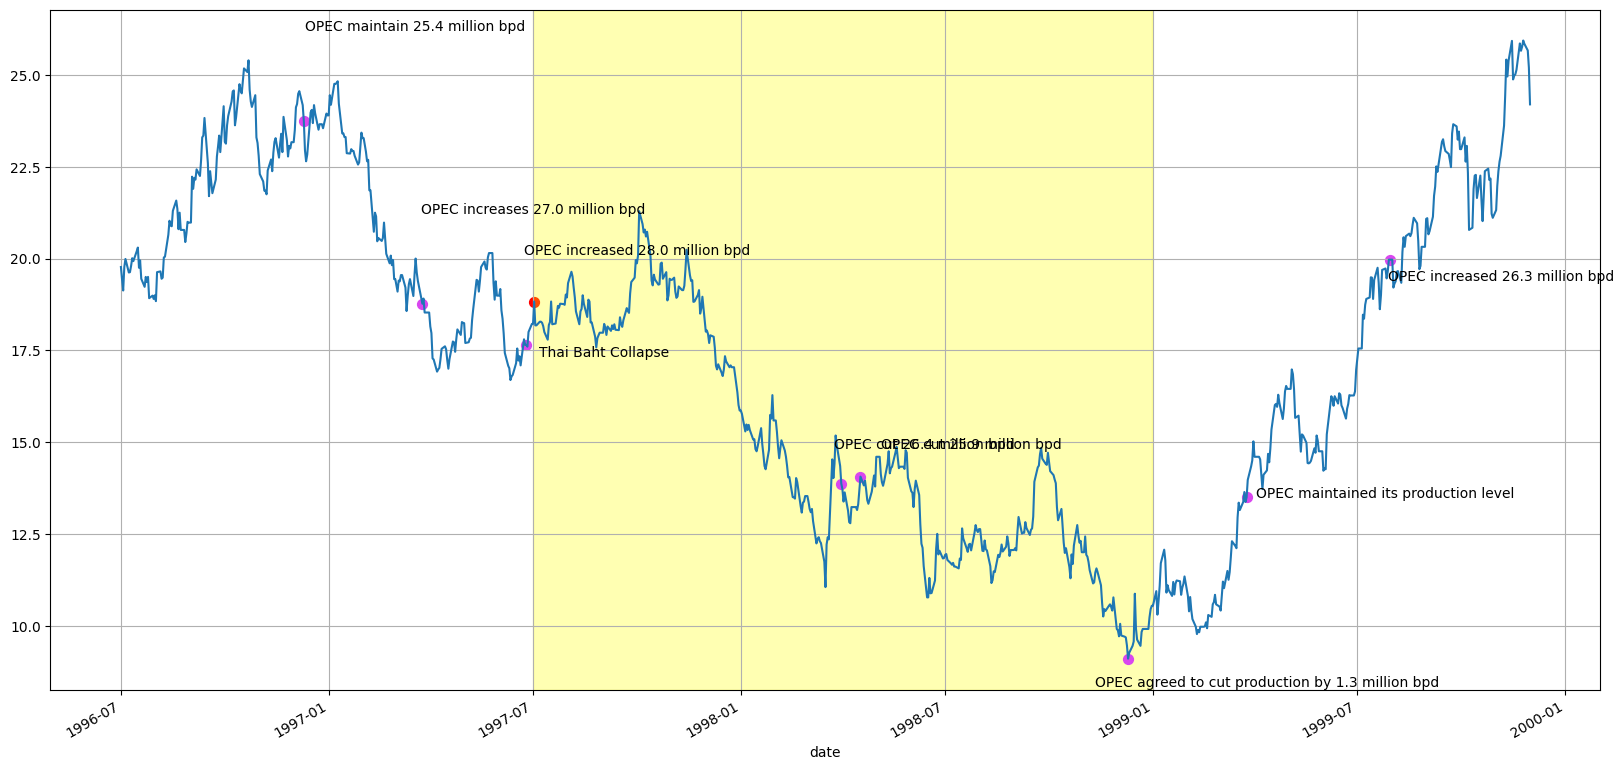

In [56]:
market = "BRENT"

plot = df['1996-07-01':'1999-12-01'][market].plot(figsize=(20, 10), grid=True)

event = f'Thai Baht Collapse'
event_date = '07-02-1997'
event_value =  df[market]['07-02-1997']

plot.scatter(pd.to_datetime([event_date]),event_value, color='red', label='Events', s=50)

plot.axvspan(pd.to_datetime('1997-07-01'), pd.to_datetime('1998-12-31'), color='yellow', alpha=0.3)

plot.annotate(event, (pd.to_datetime(event_date), event_value), 
                 textcoords="offset points", xytext=(50,-40), ha='center')

opec_decisions = (
    ("OPEC maintain 25.4 million bpd", "12-10-1996",  df[market]['12-10-1996'], (80,65)),
    ("OPEC increases 27.0 million bpd", "03-25-1997", df[market]['03-25-1997'], (80,65)),
    ("OPEC increased 28.0 million bpd", "06-25-1997", df[market]['06-25-1997'], (80,65)),
    ("OPEC cut 26.4 million bpd", "03-31-1998", df[market]['03-31-1998'], (60,25)),
    ("OPEC cut 25.9 million bpd", "04-17-1998", df[market]['04-17-1998'], (60,20)),
    ("OPEC agreed to cut production by 1.3 million bpd", "12-10-1998", df[market]['12-10-1998'], (100,-20)),
    ("OPEC maintained its production level", "03-25-1999", df[market]['03-25-1999'], (100,0)),
    ("OPEC increased 26.3 million bpd", "07-30-1999", df[market]['07-30-1999'], (80,-15)),
)

for event, date, value, text_location in opec_decisions:
    plot.scatter(pd.to_datetime([date]),value, color='#d946ef', label='Events', s=50)
    plot.annotate(event, (pd.to_datetime(date), value), 
                 textcoords="offset points", xytext=text_location, ha='center')

<Axes: xlabel='date'>

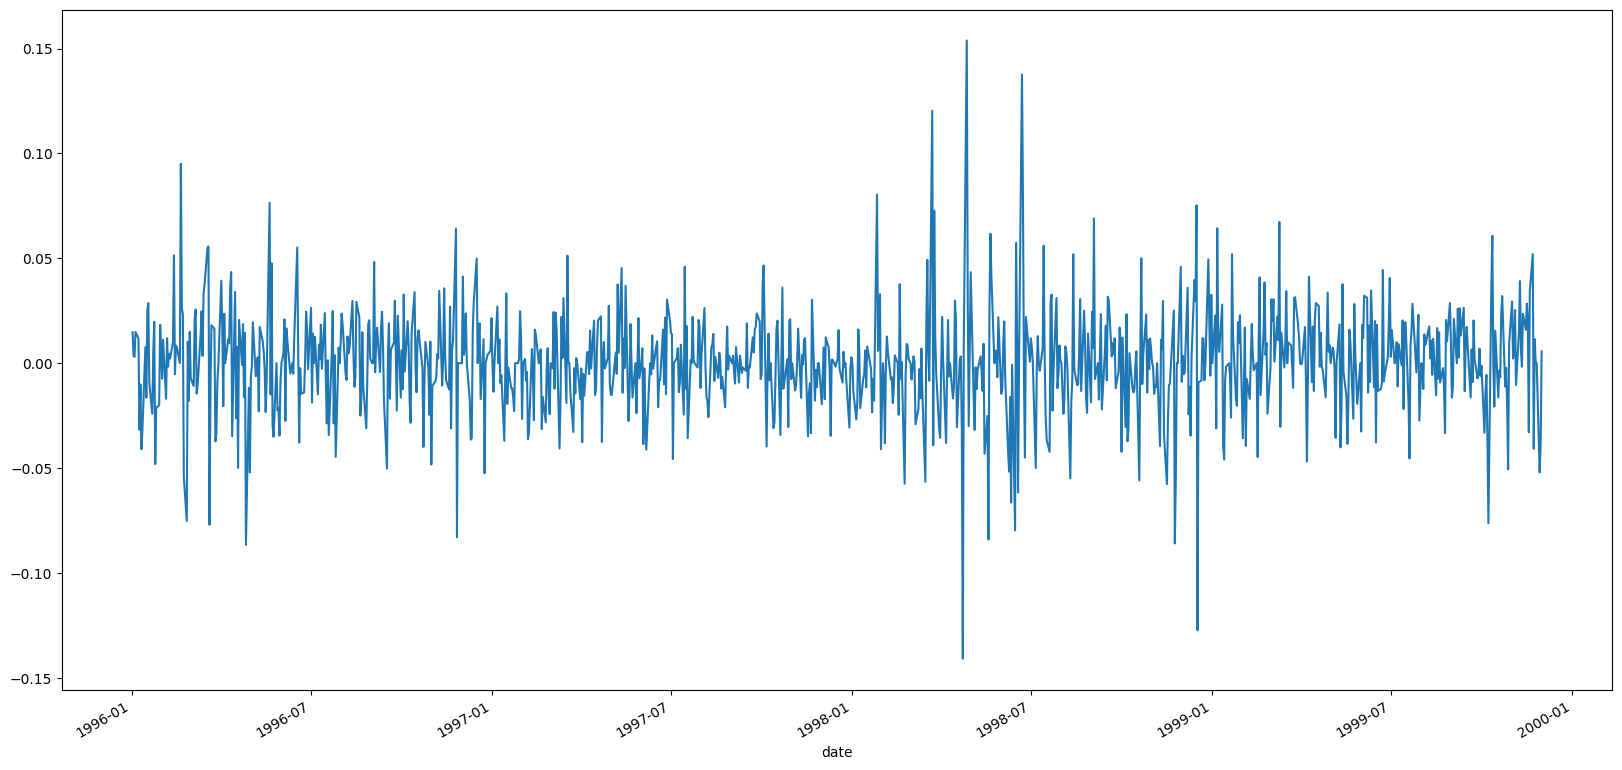

In [40]:
log_returns = np.log(df['WTI']['1996-01-01':'1999-12-01'] / df['WTI']['1996-01-01':'1999-12-01'].shift(1)).dropna()
log_returns.plot(figsize=(20, 10))

<Axes: xlabel='WTI', ylabel='Probability'>

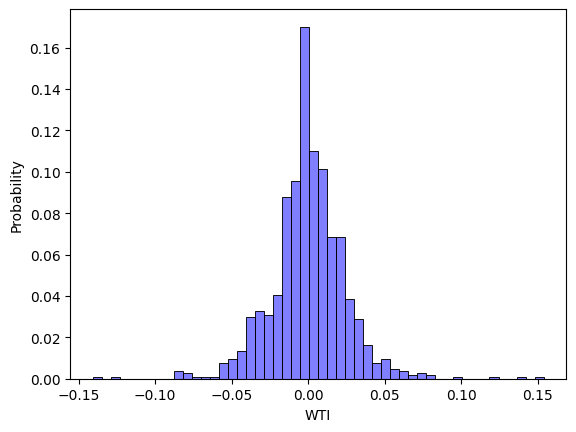

In [41]:
# Histogram
sns.histplot(log_returns, bins=50, kde=False, color='blue', stat='probability', label='Histogram', alpha=0.5)

((array([-3.20749445, -2.94304025, -2.79551264, ...,  2.79551264,
          2.94304025,  3.20749445]),
  array([-0.14085743, -0.12729024, -0.08660078, ...,  0.12034207,
          0.13754874,  0.15382669])),
 (np.float64(0.02425706771140104),
  np.float64(0.00023846579543468138),
  np.float64(0.9718995834780525)))

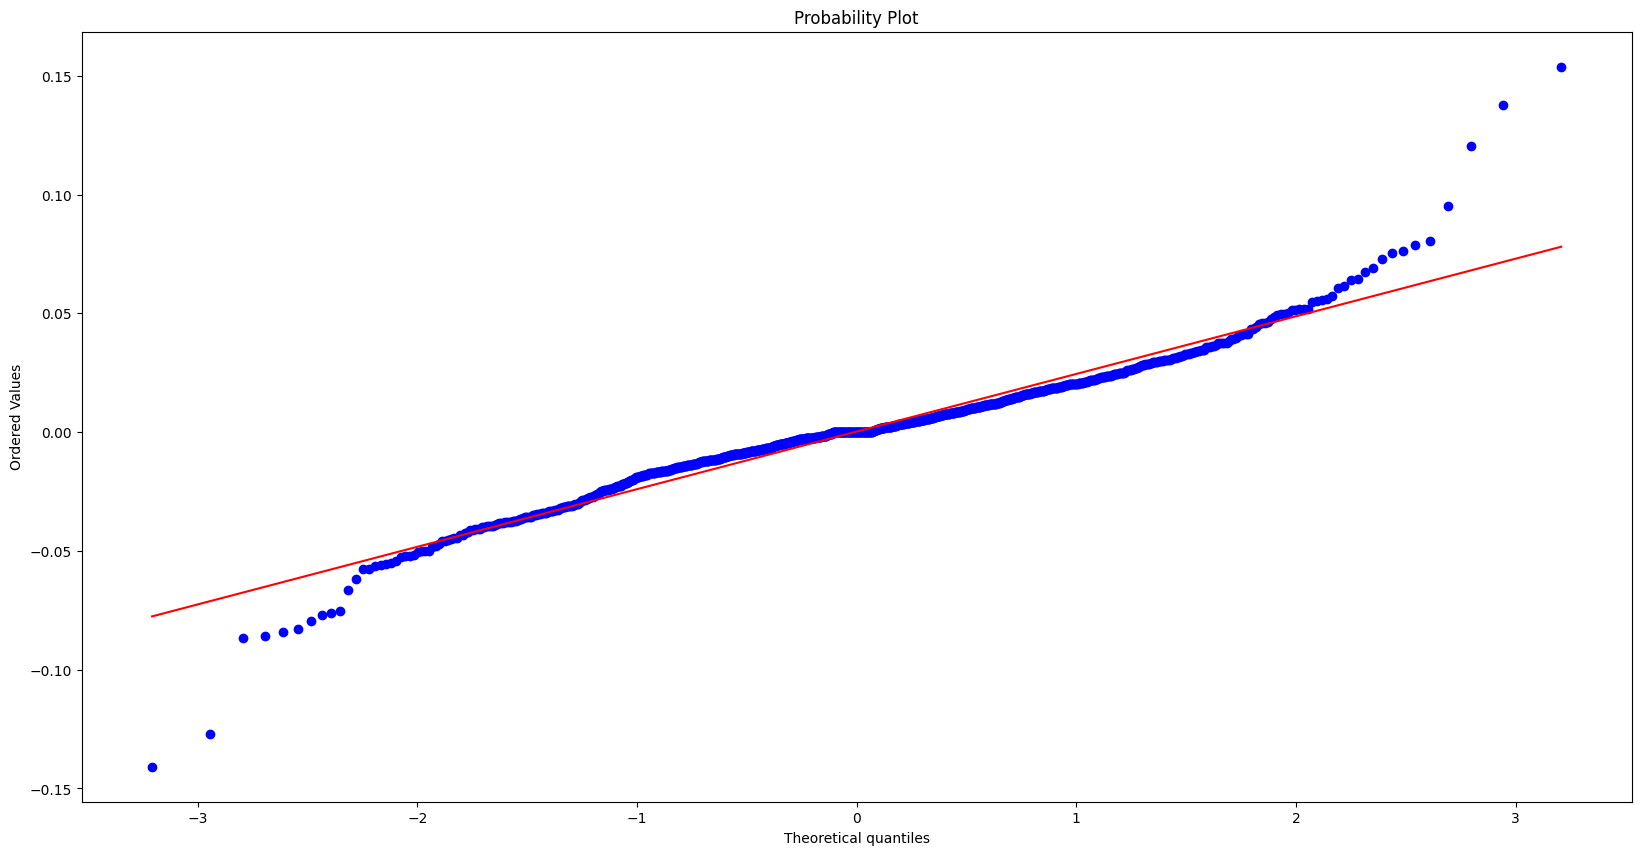

In [42]:
plt.figure(figsize=(20, 10))
stats.probplot(log_returns, dist="norm", plot=plt)

In [43]:
def variance_ratio(log_returns, k):
    n = len(log_returns)
    if n <= k:
        return np.nan
    # Calculate the number of intervals
    m = n // k
    # Calculate the sum of variances of the k-sized returns
    sum_of_vars = sum(log_returns[i * k : (i + 1) * k].var() for i in range(m))
    # Variance of the log returns
    overall_var = log_returns.var()
    return sum_of_vars / (m * overall_var)

# Step 4: Calculate variance ratios for different intervals
k_values = range(2, 20)  # Change range as needed
variance_ratios = [variance_ratio(log_returns, k) for k in k_values]

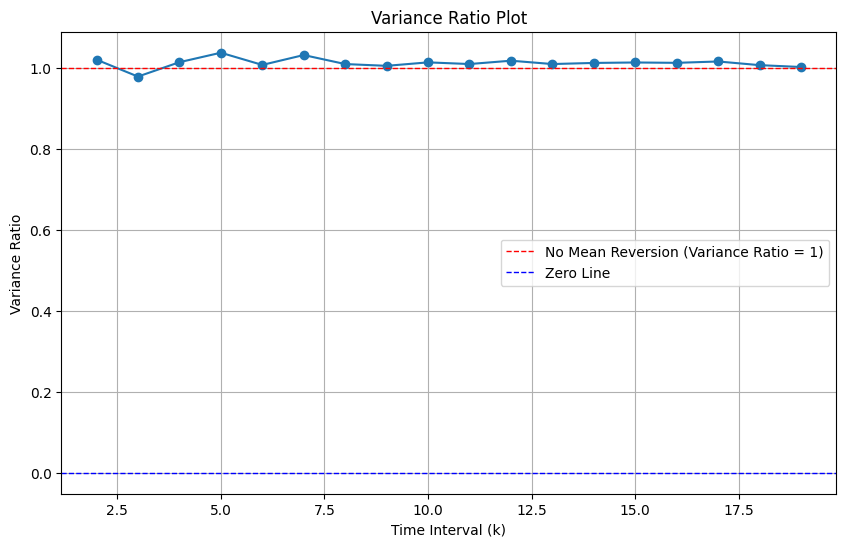

In [44]:
# plot variance ratio
plt.figure(figsize=(10, 6))
plt.plot(k_values, variance_ratios, marker='o', linestyle='-')
plt.title('Variance Ratio Plot')
plt.xlabel('Time Interval (k)')
plt.ylabel('Variance Ratio')
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='No Mean Reversion (Variance Ratio = 1)')
plt.axhline(0, color='blue', linestyle='--', linewidth=1, label='Zero Line')
plt.legend()
plt.grid()
plt.show()

In [45]:
# Create and fit the GARCH(1, 1) model
model = arch_model(log_returns, vol='Garch', p=1, q=1)
garch_fit = model.fit(disp='off')

# Print the model summary
print(garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    WTI   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2397.80
Distribution:                  Normal   AIC:                          -4787.60
Method:            Maximum Likelihood   BIC:                          -4767.84
                                        No. Observations:                 1035
Date:                Sat, Oct 05 2024   Df Residuals:                     1034
Time:                        23:37:07   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.7699e-04  7.552e-04      0.367      0.714 

/Users/mozilla/Library/Caches/pypoetry/virtualenvs/energy-analysis-zyszrSCd-py3.12/lib/python3.12/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006196. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


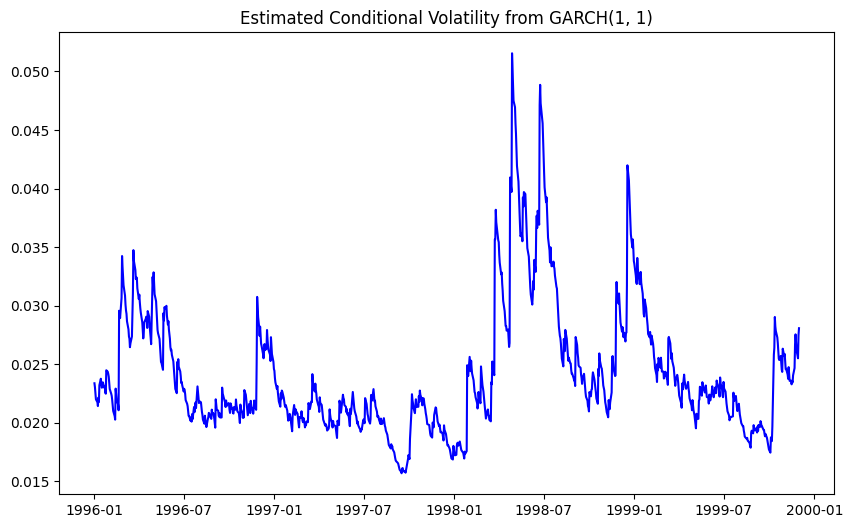

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(garch_fit.conditional_volatility, color='blue')
plt.title('Estimated Conditional Volatility from GARCH(1, 1)')
plt.show()